# Métodos

### Correlación Pearson 
###### Se utiliza para comparar variables cuantitativos y continuas y también interesa cuando se quiere medir la variación de señales juntas en el tiempo. Intervalo de [-1,1], entre más cerca a -1 es una relación inversa, si es a 1 es ua relación directa, ambas resultado de una transformación lineal. Si es 0 no existe relación lineal. 

In [1]:
#Ejemplo
import numpy as np
from scipy.stats import pearsonr

# Señales simuladas 
x = np.random.randn(1000)
y = np.random.randn(1000)

# Correlación de Pearson
r, p_value = pearsonr(x, y)

print("Coeficiente de correlación:", r)
print("p-value:", p_value)


Coeficiente de correlación: 0.03415188532938999
p-value: 0.28061383782436844


### Coherencia espectral
###### Se usa cuando la conectividad es dependiente de frecuencia. Mide la correlación lineal entre señales en dominio de frecuencia.

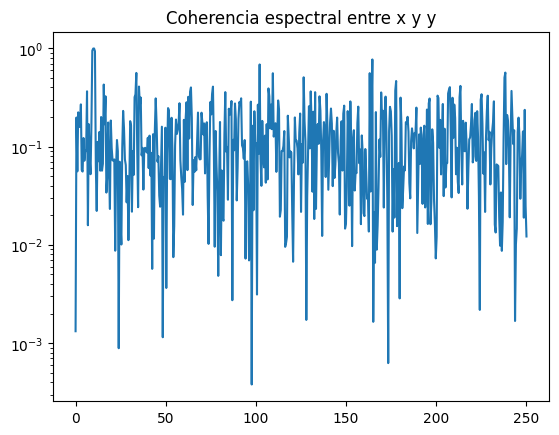

In [5]:
#Ejemplo
from scipy.signal import coherence
import numpy as np
import matplotlib.pyplot as plt
fs = 500  # Frecuencia de muestreo (Hz)
t = np.arange(0, 10, 1/fs)

# Señales simuladas
x = np.sin(2*np.pi*10*t) + np.random.randn(len(t))*0.5
y = np.sin(2*np.pi*10*t + np.pi/4) + np.random.randn(len(t))*0.5

# Coherencia espectral
f, Cxy = coherence(x, y, fs=fs, nperseg=1024)
plt.semilogy(f, Cxy)
plt.title('Coherencia espectral entre x y y')
plt.show()

### PLV
###### Valor de bloqueo de fase: mide conectividad basada solo en fase, a lo largo del tiempo o de varios ensayos. Si la señal aumenta o disminuye por encima de valor basal hay sincronización, pero si es por debajo del valor basal, hay una desincronización

In [6]:
from scipy.signal import hilbert, butter, filtfilt
import numpy as np

# Señales simuladas 
fs = 500
t = np.arange(0, 5, 1/fs)
x = np.sin(2*np.pi*10*t)
y = np.sin(2*np.pi*10*t + np.pi/6)

# 1. Filtro banda
def bandpass_filter(sig, fs, low, high):
    b, a = butter(3, [low/(fs/2), high/(fs/2)], btype='band')
    return filtfilt(b, a, sig)

x_filt = bandpass_filter(x, fs, 8, 12)
y_filt = bandpass_filter(y, fs, 8, 12)

# 2. Fase instantánea mediante transformada de Hilbert
phase_x = np.angle(hilbert(x_filt))
phase_y = np.angle(hilbert(y_filt))

# 3. PLV = promedio de la diferencia de fase
plv = np.abs(np.mean(np.exp(1j*(phase_x - phase_y))))
print("PLV:", plv)


PLV: 0.998402967717261
